Following Felix's online [notes](http://www-thphys.physics.ox.ac.uk/people/FelixParra/CollisionlessPlasmaPhysics/notes/lecV_coldplasma.pdf), find we want to find two x-modes waves, one ion cyclotron frequency apart, that both fit an integer number of wavelengths into a periodic simulation domain.

The dispersion relation $D(\omega_{choose}, k_{find})=0$ must be solved to find $k$, or conversly by fixing $k$ and finding $\omega$. In order to find a pair of waves that both fit in the box as described one must fine tune the parameters. In this notebook, I fine tune the density and keep the magnetic field fixed.

The polarisation is calculated via $\vec{\vec{D}}(\omega, k)\cdot \vec E=\vec0$ where we find the nullspace of $\vec{\vec{D}}(\omega, k)$ to give $\vec E$ and hence relative amplitudes of the components of the electric field.

For the extraordinary mode
$$
n^2=\frac{\epsilon_\bot^2-g^2}{\epsilon_\bot}\\
E_x\propto i g\\
E_y\propto -\epsilon_\bot\\
E_z = 0\\
$$
where $n=kc/\omega$
$$
\epsilon_\bot = 1- \sum_s \frac{\Pi_s^2}{\omega^2 - \Omega_s^2},\\
g = -\sum_s \frac{\Pi_s^2\Omega_s}{\omega (\omega^2 - \Omega_s^2)}
$$

Hence find $k_\alpha$ and $k_\beta$ associated with $\omega_\alpha$ and $\omega_\beta = \omega_\alpha + \Omega_i$ respectively. 

Choose $\omega_\alpha=\omega_L+ \Delta\omega$ where $\Delta \omega$ is a tuning parameter to find the right mode and to fix the wavenumber at something sensible. $\omega_L\approx \sqrt{\frac{\Omega_e^2}{4}+\Pi_e^2} + \frac{\Omega_e}{2}$ (where $\Omega_e < 0$)

Now the other parameters:

Faraday's
$$
-i\omega\vec B_1 = - \vec k \times \vec E_1
$$
Gauss's law
$$
i\vec k \cdot \vec E_1 =  \sum_s\frac{q_s n_{s,1}}{\epsilon_0}\\
$$
Ampere's law:
$$
\mu_0 \vec J = i \vec k \times \vec {B}_1 + i \omega \mu_0 \epsilon_0 \vec E_1\\
\sum_s q_s n_{s,0} \vec {v}_{s,1} = \frac{i \vec k \times \vec {B}_1}{\mu_0} + i \omega \epsilon_0 \vec E_1\\
$$
Assume the ions are unperturbed in the initial conditions
$$
q_e n_{e,0} {v}_{e,1,y} = i  \omega \epsilon_0 E_{1,x}\\
q_e n_{e,0} {v}_{e,1,y} = -\frac{i k {B}_{1,z}}{\mu_0} + i \omega \epsilon_0 E_{1,y}\\
q_e n_{e,0} {v}_{e,1,z} = \frac{i k {B}_{1,y}}{\mu_0} + i \omega \epsilon_0 E_{1,z}\\
$$

$$
n_{e,1} = i k E_{x,1}\frac{\epsilon_0}{q_s}
$$

Continuity

$$
\omega n_{1,s} - n_{0,s} \vec k \cdot \vec v_{1,s} = 0
$$




In [1]:
using Roots, Plots, LinearAlgebra

const c₀ = 2.99792458e8
const ϵ₀ = 8.854187817e-12
const μ₀ = 1.25663706144e-6
const q₀ = 1.602176487e-19
const mₑ = 9.10938188e-31
const n0 = 1e19
const B0 = 2.0
fΠ(n, m::Float64=mₑ) = √(q₀^2 * n / m / ϵ₀)
const Π = fΠ(n0)
fΩ(m=mₑ, Z::Int=-1) = Z * q₀ * B0 / m
const Ω = fΩ(mₑ, -1)
const mi = 1836 * mₑ * 2
const Ωi = fΩ(mi, 1)
fωL(n) = sqrt(Ω^2 / 4 + fΠ(n)^2) + Ω / 2
const ωL = fωL(n0)
fωₕ(n) = √(fΠ(n)^2 + Ω^2)
const ωₕ = √(fΠ(n0)^2 + Ω^2)
const Te_eV = 10e3
const Ti_eV = 10e3
const vth = sqrt(2 * 10e3 * q₀ / mₑ)
fλD(n) = vth / fΠ(n)
const λD = fλD(n0)
const fbulkenergydensity(n) = B0^2 / 2μ₀ + n * Te_eV * q₀ + n * Ti_eV * q₀


# fcxx(ω, Π, Ω) = ϵ₀ * Π^2 * im * ω / (ω^2 - Ω^2)
# fcxy(ω, Π, Ω) = - ϵ₀ * Π^2 * Ω / (ω^2 - Ω^2)
# fczz(ω, Π, Ω) = ϵ₀ * Π^2 * im / ω
# function fcond(ω, n, m=mₑ, Z=-1)
#   Ωs = fΩ(m, Z) 
#   Πs = fΠ(n, m) 
#   return [fcxx(ω, Πs, Ωs) fcxy(ω, Πs, Ωs) 0.0; 
#          -fcxy(ω, Πs, Ωs) fcxx(ω, Πs, Ωs) 0.0;
#           0.0             0.0             fczz(ω, Πs, Ωs)]
# end
# fϵ(ω, n) = I(3) + im / (ω * ϵ₀) * (fcond(ω, n, mₑ, -1) + fcond(ω, n, mi, 1))
# fK(k, θ=pi/2) = k * [sin(θ), 0, cos(θ)]
# function fΛ(ω, k, n, θ=pi/2)
#     K = fK(k, θ)
#     return K * K' .- dot(K, K) * I(3) .+ ω^2 /c₀^2 * fϵ(ω, n)
# end
# function fE(ω, k, n, θ=pi/2)
#   _, sigma, Vt = svd(fΛ(ω, k, n, θ))
#   return Vt[:, 3]
# end
# Dxwave(ω, k, n=n0) = (o = real(det(fΛ(ω, k, n))); @show o; return o)

σg(ω, n, m::Float64, Z::Int) = fΠ(n, m)^2 * fΩ(m, Z) / ω / (ω^2 - fΩ(m, Z)^2)
g(ω, n) = - σg(ω, n, mₑ, -1) - σg(ω, n, mi, 1)
σϵ⊥(ω, n, m::Float64, Z::Int) = fΠ(n, m)^2 / (ω^2 - fΩ(m, Z)^2)
ϵ⊥(ω, n) = 1 - σϵ⊥(ω, n, mₑ, -1) - σϵ⊥(ω, n, mi, 1)
Dxwave(ω, k, n=n0) = ϵ⊥(ω, n) * ((c₀*k/ω)^2 - ϵ⊥(ω, n)) + g(ω, n)^2
# σ = im ϵ₀ ω (I - ϵ)
# σ = im ϵ₀ ω [1 - ϵ⊥   -ig     ;
#              ig        1 - ϵ⊥]
function fσ(ω, k, n, m::Float64, Z::Int)
  return [σϵ⊥(ω, n, m, Z) im * σg(ω, n, m, Z) 0;
          -im * σg(ω, n, m, Z) σϵ⊥(ω, n, m, Z) 0;
          0 0 0] * im * ϵ₀ * ω
end

fΛ(ω, k, n) = [ϵ⊥(ω, n) im * g(ω, n);-im * g(ω, n) ϵ⊥(ω, n) - (c₀ * k / ω)^2]
function fP(ω, k, n)
  _, sigma, Vt = svd(fΛ(ω, k, n))
  return Vt[:, 2]
end

fE(ω, k, n) = [im * g(ω, n), -ϵ⊥(ω, n), 0]
fB(ω, k, n) = cross([k, 0, 0], fE(ω, k, n)) / ω
fJ(ω, k, n, m::Float64, Z::Int) = fσ(ω, k, n, m, Z) * fE(ω, k, n)
fJ(ω, k, n) = fJ(ω, k, n, mₑ, -1) + fJ(ω, k, n, mi, 1)
fV(ω, k, n, m::Float64=mₑ, Z::Int=-1) = Z * fJ(ω, k, n, m, Z) / q₀ / n
fn(ω, k, n, m::Float64=mₑ, Z::Int=-1) = n * k * fV(ω, k, n, m, Z)[1] / ω


fn (generic function with 3 methods)

In [2]:
vthi = sqrt(Te_eV * q₀ * 2 / mi)
rli = vthi / Ωi
vthe = sqrt(Te_eV * q₀ * 2 / mₑ)
rle = vthe / abs(Ω)

NG = 8 * 1024
dx = min(λD, rle)
Lx = NG * dx
Kl = 2π / Lx
nka = 32
nkb = nka + 1
ka = nka * Kl
kb = nkb * Kl
function findn(n1)
  n1 <= 0 && return Inf
  ωa_Π = Roots.fzero(ω->Dxwave(ω * Π, ka, n1[1] * n0), 2, fatol=eps())
  @assert abs(Dxwave(ωa_Π * Π, ka, n1[1] * n0)) < 100*eps()
  ωa = ωa_Π * Π
  ωtarget = ωa + Ωi
  return Dxwave(ωtarget, kb, n1[1] * n0)
end

n1 = Roots.fzero(findn, 10, xatol=1e-12)
n01 = n1 * n0
@show n1, n01, Ω / fΠ(n01)
ωstart = fΠ(n01) * 2

ωa = Roots.fzero(ω->Dxwave(ω * Π, nka * Kl, n01), 2, fatol=eps()) * Π

kb = nkb * Kl
ωb = ωa + Ωi
# assert that (ωa, ka) and (ωb, kb) are in fact solutions
@assert isapprox(ωa + Ωi, ωb, atol=1e-12)
@assert isapprox(ka, nka * Kl, atol=1e-12)
@assert isapprox(kb, nkb * Kl, atol=1e-12)
@assert isapprox(Dxwave(ωa, ka, n01), 0.0, atol=1e-14) "Dxwave(ωa, ka, n01) = $(Dxwave(ωa, ka, n01))"
@assert isapprox(Dxwave(ωb, kb, n01), 0.0, atol=1e-14) "Dxwave(ωb, kb, n01) = $(Dxwave(ωb, kb, n01))"

(n1, n01, Ω / fΠ(n01)) = (9.719738576349268, 9.719738576349268e19, -0.6324593453793576)


In [3]:
function findpolarisation(ω, k, n)
  Ep = fE(ω, k, n)
  Bp = fB(ω, k, n)
  Jp = fJ(ω, k, n)
  Ve = fV(ω, k, n, mₑ, -1)
  ne = fn(ω, k, n, mₑ, -1)
  Vi = fV(ω, k, n, mi, 1)
  ni = fn(ω, k, n, mi, 1)
  @assert Bp[1] == 0.0 # monopoles
  @assert ω * Bp[3] ≈ k * Ep[2] # Faraday a
  @assert ω * Bp[2] ≈ -k * Ep[3] # Faraday b, trivially zero
  @assert μ₀ * Jp[1] ≈ im * ω * μ₀ * ϵ₀ * Ep[1] # Ampere x
  @assert μ₀ * Jp[2] ≈ - im * k * Bp[3] + im * ω * μ₀ * ϵ₀ * Ep[2] # Ampere y
  @assert μ₀ * Jp[3] ≈ im * k * Bp[2] + im * ω * μ₀ * ϵ₀ * Ep[3] # Ampere z
  @assert im * k * Ep[1] * ϵ₀ ≈ q₀ * (ni - ne) # Gauss
  @assert im * k * Jp[1] ≈ im * q₀ * (ni - ne) * ω # divJ + drho/dt = 0 
  @assert Jp[1] ≈ q₀ * n01 * (Vi - Ve)[1] # current 1
  @assert Jp[2] ≈ q₀ * n01 * (Vi - Ve)[2] # current 2
  @assert Jp[3] ≈ q₀ * n01 * (Vi - Ve)[3] # current 1
  return (E=Ep, B=Bp, ve=Ve, ne=ne, vi=Vi, ni=ni)
end
pa = findpolarisation(ωa, ka, n01)
pb = findpolarisation(ωb, kb, n01)
# @show pa[:E][1:2] ./ norm(pa[:E]) ≈ (im * fP(ωa, ka, n01))


(E = ComplexF64[0.0 + 6.084929641795611im, 6.078884659701544 + 0.0im, 0.0 + 0.0im], B = ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 2.230096462204074e-9 + 0.0im], ve = ComplexF64[1.4149809147977865 - 0.0im, -0.0 - 1.3964680426398244im, -0.0 - 0.0im], ne = 5.045508148932347e10 - 0.0im, vi = ComplexF64[-0.0007124363623081944 + 0.0im, 0.0 + 0.0007117289342329838im, 0.0 + 0.0im], ni = -2.54039007454416e7 + 0.0im)

In [4]:
function scale(polarisation, factor)
  return NamedTuple(k=>factor * v for (k, v) in pairs(polarisation))
end
function zeroions(polarisation)
  return NamedTuple(k=>!(k in (:vi, :ni)) * v for (k, v) in pairs(polarisation))
end
function energy(polarisation)
  E = polarisation[:E]
  B = polarisation[:B]
  ve = polarisation[:ve]
  vi = polarisation[:vi]
  return real(ϵ₀ * dot(E,E) / 2 + dot(B,B) / 2μ₀ +
            mₑ * n01 * dot(ve,ve) / 2 + mi * n01 * dot(vi,vi) / 2)
end
printer(polarisation, i) = printer(stdout, polarisation, i)

function printcommon(io)
  println(io, "n0 = $n01")
  println(io, "B0 = $B0")
  println(io, "Lx = $Lx")
  println(io, "NG = $NG")        
  println(io, "Te_eV = $Te_eV")
end

function printer(io, polarisation, i)
  E = polarisation[:E]
  B = polarisation[:B]
  ve = polarisation[:ve]
  ne = polarisation[:ne]
  vi = polarisation[:vi]
  ni = polarisation[:ni]

  println(io, "Ex$(i)_cos = $(real(E[1]))")
  println(io, "Ex$(i)_sin = $(imag(E[1]))")
  println(io, "Ey$(i)_cos = $(real(E[2]))")
  println(io, "Ey$(i)_sin = $(imag(E[2]))")
  println(io, "Ez$(i)_cos = $(real(E[3]))")
  println(io, "Ez$(i)_sin = $(imag(E[3]))")

  println(io, "Bx$(i)_cos = $(real(B[1]))")
  println(io, "Bx$(i)_sin = $(imag(B[1]))")
  println(io, "By$(i)_cos = $(real(B[2]))")
  println(io, "By$(i)_sin = $(imag(B[2]))")
  println(io, "Bz$(i)_cos = $(real(B[3]))")
  println(io, "Bz$(i)_sin = $(imag(B[3]))")

  println(io, "Px$(i)e_cos = $(real(ve[1]) * mₑ)")
  println(io, "Px$(i)e_sin = $(imag(ve[1]) * mₑ)")
  println(io, "Py$(i)e_cos = $(real(ve[2]) * mₑ)")
  println(io, "Py$(i)e_sin = $(imag(ve[2]) * mₑ)")
  println(io, "Pz$(i)e_cos = $(real(ve[3]) * mₑ)")
  println(io, "Pz$(i)e_sin = $(imag(ve[3]) * mₑ)")

  println(io, "Px$(i)i_cos = $(real(vi[1]) * mi)")
  println(io, "Px$(i)i_sin = $(imag(vi[1]) * mi)")
  println(io, "Py$(i)i_cos = $(real(vi[2]) * mi)")
  println(io, "Py$(i)i_sin = $(imag(vi[2]) * mi)")
  println(io, "Pz$(i)i_cos = $(real(vi[3]) * mi)")
  println(io, "Pz$(i)i_sin = $(imag(vi[3]) * mi)")
        
  println(io, "Jx$(i)_cos = $(q₀ * n01 * real(vi[1] - ve[1]))")
  println(io, "Jx$(i)_sin = $(q₀ * n01 * imag(vi[1] - ve[1]))")
  println(io, "Jy$(i)_cos = $(q₀ * n01 * real(vi[2] - ve[2]))")
  println(io, "Jy$(i)_sin = $(q₀ * n01 * imag(vi[2] - ve[2]))")
  println(io, "Jz$(i)_cos = $(q₀ * n01 * real(vi[3] - ve[3]))")
  println(io, "Jz$(i)_sin = $(q₀ * n01 * imag(vi[3] - ve[3]))")
        
  println(io, "nx$(i)e_cos = $(real(ne))")
  println(io, "nx$(i)e_sin = $(imag(ne))")
        
  println(io, "nx$(i)i_cos = $(real(ni))")
  println(io, "nx$(i)i_sin = $(imag(ni))")        
end
bulkenergydensity = fbulkenergydensity(n01)
energyratio = 1e-2
pb = scale(pb, sqrt(energy(pa) / energy(pb)))
@assert energy(pa) ≈ energy(pb)
pa = scale(pa, sqrt(bulkenergydensity * energyratio / energy(pa)))
pb = scale(pb, sqrt(bulkenergydensity * energyratio / energy(pb)))
@assert energy(pa) ≈ energyratio * bulkenergydensity
@assert energy(pb) ≈ energyratio * bulkenergydensity

open("null.prefix.deck","w") do io
  println(io, "begin:constant")
  printcommon(io)
  println(io, "# Wave A")
  println(io, "w1 = $ωa")
  println(io, "k1 = $ka")
  printer(io, scale(pa, 0), 1)
  println(io, "# Wave B")
  println(io, "w2 = $ωb")
  println(io, "k2 = $kb")
  printer(io, scale(pb, 0), 2)
end

open("wave1.prefix.deck","w") do io
  println(io, "begin:constant")
  printcommon(io)
  println(io, "# Wave A")
  println(io, "w1 = $ωa")
  println(io, "k1 = $ka")
  printer(io, pa, 1)
  println(io, "# Wave B")
  println(io, "w2 = $ωb")
  println(io, "k2 = $kb")
  printer(io, scale(pb, 0), 2)
end

open("wave2.prefix.deck","w") do io
  println(io, "begin:constant")
  printcommon(io)
  println(io, "# Wave A")
  println(io, "w1 = $ωa")
  println(io, "k1 = $ka")
  printer(io, scale(pa, 0), 1)
  println(io, "# Wave B")
  println(io, "w2 = $ωb")
  println(io, "k2 = $kb")
  printer(io, pb, 2)
end

open("both.prefix.deck","w") do io
  println(io, "begin:constant")
  printcommon(io)
  println(io, "# Wave A")
  println(io, "w1 = $ωa")
  println(io, "k1 = $ka")
  printer(io, pa, 1)
  println(io, "# Wave B")
  println(io, "w2 = $ωb")
  println(io, "k2 = $kb")
  printer(io, pb, 2)
end


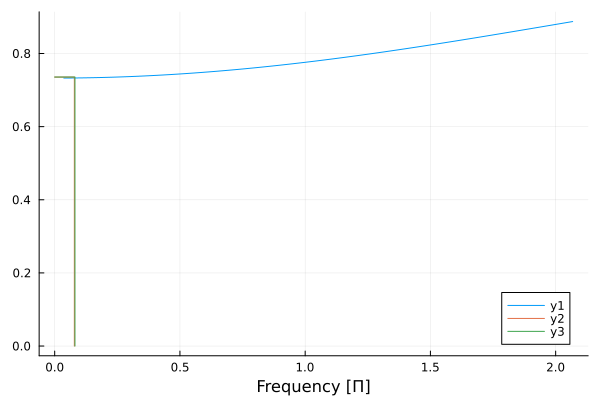

In [5]:
ωs = range(fωL(n01), stop=0.75fωₕ(n01), length=1024);
ks = [try;Roots.fzero(k->Dxwave(ω, k, n01), abs(Ω)/c₀);catch;missing;end for ω in ωs];

plot(ks .* c₀ / Π, ωs ./ fΠ(n01))
plot!([1, 1, 0, 1] .* ka * c₀ / fΠ(n01), [0, 1, 1, 1] .* ωa / fΠ(n01))
plot!([1, 1, 0, 1] .* kb * c₀ / fΠ(n01), [0, 1, 1, 1] .* ωb / fΠ(n01))
xlabel!("Wavenumber [Π / c]")
xlabel!("Frequency [Π]")
